## SLR-1: CA Coastal Commission (CCC) Risk Factors


        county_name risk_total
0         Del Norte          8
1          Humboldt          9
2         Mendocino          5
3            Sonoma          7
4             Marin          5
5     San Francisco          7
6         San Mateo          5
7        Santa Cruz          7
8          Monterey          8
9   San Luis Obispo          9
10    Santa Barbara          9
11          Ventura         10
12      Los Angeles          9
13           Orange          8
14        San Diego          9


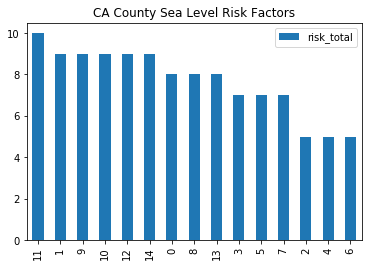

In [16]:
''' SLR-1:  CA Coastal Commission (CCC) Risk Factors
Use pandas to create a dataviz for All Counties and risks (bar chart)'''

# numpy as dependency of pandas
import numpy as np 
import pandas as pd

import matplotlib 
import matplotlib.pyplot as plt

# import custom created module
import api_data_utils 

# enable matplotlib inline 
%matplotlib inline 

# create a df from parsed json 
df = api_data_utils.fetch_and_parse_json()

# create a filtered dataframe - drop most cols + adding risk_total col
df_filtered = df.drop(['id', 'latitude', 'longitude', 'assessment', 'case_study', 'resources', 'economy', 'LCPs', 'photos'], axis=1)
df_filtered['risk_total'] = None

# iterate over a df  -- with iterrows
for index, row in df_filtered.iterrows(): 
    # sum up the risks and assign it to the risk_total col
    risk_dict = dict(row['risks'][0])
    df_filtered['risk_total'][index] = sum(risk_dict.values())
    
# now remove the risks column
df_filtered = df_filtered.drop(['risks'],axis=1)

# print the dataframe (will render a table)
print(df_filtered)

# finally, plot the results inline
df_filtered.sort_values('risk_total', ascending=False).plot(kind='bar', title='CA County Sea Level Risk Factors')


# TODO: improve the labels - use county name for x-axis 
# seems easier with pyplot than directly using pandas

